In [100]:
# !pip install xgboost

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


plt.style.use('dark_background')

In [102]:
df = pd.read_csv('./data/stud.csv')

In [103]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [104]:
df['avg_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3

In [105]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [106]:
x = df.drop('avg_score', axis = 'columns')
y = df['avg_score']

Seperating Categorical and Numeric Columns:

In [107]:
cat_col = [feature for feature in df.columns if df[feature].dtype == 'O']
num_col = [feature for feature in x.columns if x[feature].dtype != 'O']

In [108]:
cat_col

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [109]:
num_col

['math_score', 'reading_score', 'writing_score']

DIstributing the data into numeric and categorical colums:

In [110]:
n_gender = df['gender'].nunique()
gender_un = df['gender'].unique()
print('Gender has {} number of unique values as {}'.format(n_gender, gender_un))

n_race = df['race_ethnicity'].nunique()
race_un = df['race_ethnicity'].unique()
print('Race Ethnicity has {} number of uniqie values such as {}'.format(n_race, race_un))

n_par_ed = df['parental_level_of_education'].nunique()
par_ed_uq = df['parental_level_of_education'].unique()
print('Parentaal level of education has {} number of unique values such as {}'.format(n_par_ed, par_ed_uq))

n_lunch = df['lunch'].nunique()
lunch_uq = df['lunch'].unique()
print('Lunch column has {} number of unique values as {}'.format(n_lunch, lunch_uq))

n_test = df['test_preparation_course'].nunique()
test_uq = df['test_preparation_course'].unique()
print('Tets Preparation Course has {} number of unique values such as {}'.format(n_test, test_uq))

Gender has 2 number of unique values as ['female' 'male']
Race Ethnicity has 5 number of uniqie values such as ['group B' 'group C' 'group A' 'group D' 'group E']
Parentaal level of education has 6 number of unique values such as ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch column has 2 number of unique values as ['standard' 'free/reduced']
Tets Preparation Course has 2 number of unique values such as ['none' 'completed']


In [111]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [112]:
x = df.drop('avg_score', axis = 'columns')
y = df['avg_score']

In [113]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Categorical Data :

In [114]:
ctg = df.select_dtypes(include = 'object')
ctg.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


Numerical Data :

In [115]:
num = x.select_dtypes(exclude = 'object')
num.head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [116]:
ohe = OneHotEncoder(drop = 'first')
a = df[['gender',	'race_ethnicity',	'parental_level_of_education','lunch','test_preparation_course']]

In [117]:
data = ohe.fit_transform(a)
data.toarray()

array([[0., 1., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [118]:
data_f = pd.DataFrame(data.toarray(), columns = ohe.get_feature_names_out(a.columns))

In [119]:
data_f

,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
996,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [120]:
num.columns

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

Converted the Categorical Data into numeric data 

In [121]:
sclr = MinMaxScaler()

In [122]:
data = num[['math_score', 'reading_score', 'writing_score']]

In [123]:
n_data = sclr.fit_transform(data)
n_data

array([[0.72      , 0.6626506 , 0.71111111],
       [0.69      , 0.87951807, 0.86666667],
       [0.9       , 0.93975904, 0.92222222],
       ...,
       [0.59      , 0.65060241, 0.61111111],
       [0.68      , 0.73493976, 0.74444444],
       [0.77      , 0.8313253 , 0.84444444]])

In [124]:
data_n = pd.DataFrame(n_data, columns = sclr.get_feature_names_out(num.columns))

In [125]:
data_n

,math_score,reading_score,writing_score
0,0.72,0.662651,0.711111
1,0.69,0.879518,0.866667
2,0.90,0.939759,0.922222
3,0.47,0.481928,0.377778
4,0.76,0.734940,0.722222
...,...,...,...
995,0.88,0.987952,0.944444
996,0.62,0.457831,0.500000
997,0.59,0.650602,0.611111
998,0.68,0.734940,0.744444


In [126]:
x = pd.concat([data_f, data_n], axis = 'columns')

In [127]:
x.head()

,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none,math_score,reading_score,writing_score
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.72,0.662651,0.711111
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.69,0.879518,0.866667
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.90,0.939759,0.922222
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.47,0.481928,0.377778
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.76,0.734940,0.722222


In [128]:
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: avg_score, dtype: float64

In [129]:
def eval_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mse, mae, rmse, r2

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Checking for Multiple Regression Models :

In [153]:
models = {
    'LinearRegression':LinearRegression(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'DecisionTreeClassifier':DecisionTreeRegressor()
}


# List for storing the various parameters of model Evaluation 
mdl = []
r2_scores = []
mse = []
mae = []
rmse = []



for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    means_sqd_error, mean_abs_error,root_mse, r2_value  = eval_model(pred, y_test)
    mdl.append(list(models.keys())[i])
    print('The model {} has scores as follows : '.format(list(models.keys())[i]))
    mse.append(means_sqd_error)
    print('Mean Squared Error : {}'.format(means_sqd_error))
    mae.append(mean_abs_error)
    print('Mean Absolute Error : {}'.format(mean_abs_error))
    rmse.append(root_mse)
    print('Root Mean Squared Error : {}'.format(root_mse))
    r2_scores.append(r2_value)
    print('R2 Score : {} \n \n '.format(r2_value))

    print( '--------------------------------------------------------------------------------------\n \n ')

The model LinearRegression has scores as follows : 
Mean Squared Error : 4.65289094561078e-28
Mean Absolute Error : 1.745092959026806e-14
Root Mean Squared Error : 2.157056083093525e-14
R2 Score : 1.0 
 
 
--------------------------------------------------------------------------------------
 
 
The model AdaBoostRegressor has scores as follows : 
Mean Squared Error : 4.709613971746735
Mean Absolute Error : 1.4800437225426417
Root Mean Squared Error : 2.170164503383726
R2 Score : 0.9761500249984476 
 
 
--------------------------------------------------------------------------------------
 
 
The model RandomForestRegressor has scores as follows : 
Mean Squared Error : 1.211791111111104
Mean Absolute Error : 0.5809333333333313
Root Mean Squared Error : 1.1008138403522658
R2 Score : 0.9941829227165482 
 
 
--------------------------------------------------------------------------------------
 
 
The model XGBRegressor has scores as follows : 
Mean Squared Error : 1.0045447436182127
Mean

Here Linear regression worked exceptionally well hence we will go with linear regression

In [132]:
mdl

['LinearRegression',
 'AdaBoostRegressor',
 'RandomForestRegressor',
 'XGBRegressor',
 'DecisionTreeClassifier']

In [133]:
pd.DataFrame(list(zip(mdl, r2_scores, mse, mae, rmse)), columns=['Model Name','R2 Score','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error'])

,Model Name,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
0,LinearRegression,1.000000,4.652891e-28,1.745093e-14,2.157056e-14
1,AdaBoostRegressor,0.980696,3.775212e+00,1.278706e+00,1.942991e+00
2,RandomForestRegressor,0.993948,1.255800e+00,5.982800e-01,1.120625e+00
3,XGBRegressor,0.995372,1.004545e+00,6.055106e-01,1.002270e+00
4,DecisionTreeClassifier,0.985146,3.193333e+00,1.308000e+00,1.786990e+00


### Taking Linear Regression Model :

In [134]:
regressor = LinearRegression()

In [135]:
regressor.fit(X_train, y_train)

LinearRegression()

In [136]:
pred = regressor.predict(X_test)

In [137]:
score = r2_score(pred, y_test)*100
print('Accuracy score of the model is : {}'.format(score))

Accuracy score of the model is : 100.0


Model overfitted 

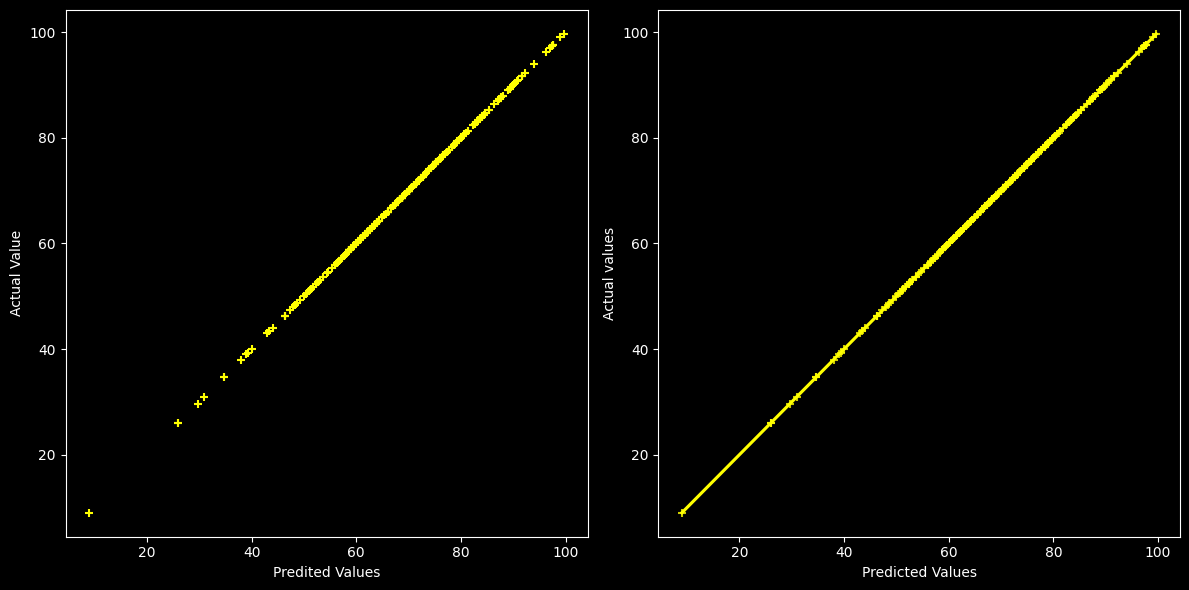

In [152]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

plt.subplot(121)
plt.scatter(pred, y_test, color = 'yellow', marker='+')
plt.xlabel('Predited Values')
plt.ylabel('Actual Value')

plt.subplot(122)
sns.regplot(x = pred, y = y_test, color = 'yellow', marker = '+')
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')

plt.tight_layout()